# Import Libraries


In [1]:
import os
import urllib

# Numpy and Pandas libraries for storing and manipulating data
import numpy as np
import pandas as pd

# Seaborn and Matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn Descision Tree, Logistic Regression and helper function
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

RANDOM_SEED = 10

In [3]:
# Load the data
draft_data = pd.read_csv(r"C:\Users\jason\Downloads\archive\nfl_combine_2010_to_2023.csv")

draft_data

,Year,Player,Pos,School,Height,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted,Round,Pick
0,2010,Seyi Ajirotutu,WR,Fresno State,6-3,204.0,4.60,36.0,14.0,115.0,7.22,4.39,False,NaN,NaN
1,2010,Rahim Alem,DE,LSU,6-3,251.0,4.75,30.5,NaN,106.0,7.54,4.80,False,NaN,NaN
2,2010,Charles Alexander,DT,LSU,6-4,300.0,5.40,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
3,2010,Danario Alexander,WR,Missouri,6-5,215.0,4.62,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
4,2010,Nate Allen,S,South Florida,6-0,207.0,4.50,NaN,16.0,NaN,NaN,NaN,True,2.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,2023,Luke Wypler,C,Ohio St.,6-3,303.0,5.14,30.5,NaN,106.0,7.64,4.53,True,6.0,190.0
4737,2023,Bryce Young,QB,Alabama,5-10,204.0,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0,1.0
4738,2023,Byron Young,DT,Alabama,6-3,294.0,NaN,26.0,24.0,108.0,7.68,NaN,True,3.0,70.0
4739,2023,Byron Young,EDGE,Tennessee,6-2,250.0,4.43,38.0,22.0,132.0,7.19,NaN,True,3.0,77.0


In [4]:
draft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        4741 non-null   int64  
 1   Player      4741 non-null   object 
 2   Pos         4741 non-null   object 
 3   School      4741 non-null   object 
 4   Height      4712 non-null   object 
 5   Weight      4717 non-null   float64
 6   40yd        4194 non-null   float64
 7   Vertical    3731 non-null   float64
 8   Bench       3166 non-null   float64
 9   Broad Jump  3671 non-null   float64
 10  3Cone       2794 non-null   float64
 11  Shuttle     2909 non-null   float64
 12  Drafted     4741 non-null   bool   
 13  Round       3008 non-null   float64
 14  Pick        3008 non-null   float64
dtypes: bool(1), float64(9), int64(1), object(4)
memory usage: 523.3+ KB


In [5]:
draft_data.describe()

,Year,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Round,Pick
count,4741.000000,4717.000000,4194.000000,3731.000000,3166.000000,3671.000000,2794.000000,2909.000000,3008.000000,3008.000000
mean,2016.626661,241.683909,4.761068,32.926776,20.194251,115.855625,7.251933,4.415895,3.840093,115.872340
std,4.028045,45.384582,0.301064,4.205529,6.432676,9.290842,0.405234,0.262608,1.915932,70.726114
min,2010.000000,144.000000,4.220000,17.500000,2.000000,82.000000,6.280000,3.810000,1.000000,1.000000
25%,2013.000000,204.000000,4.530000,30.000000,15.000000,110.000000,6.960000,4.220000,2.000000,55.000000
50%,2017.000000,231.000000,4.670000,33.000000,20.000000,117.000000,7.150000,4.370000,4.000000,111.000000
75%,2020.000000,277.000000,4.950000,36.000000,24.000000,122.000000,7.500000,4.580000,5.000000,172.000000
max,2023.000000,384.000000,6.000000,46.500000,49.000000,147.000000,9.040000,5.560000,7.000000,262.000000


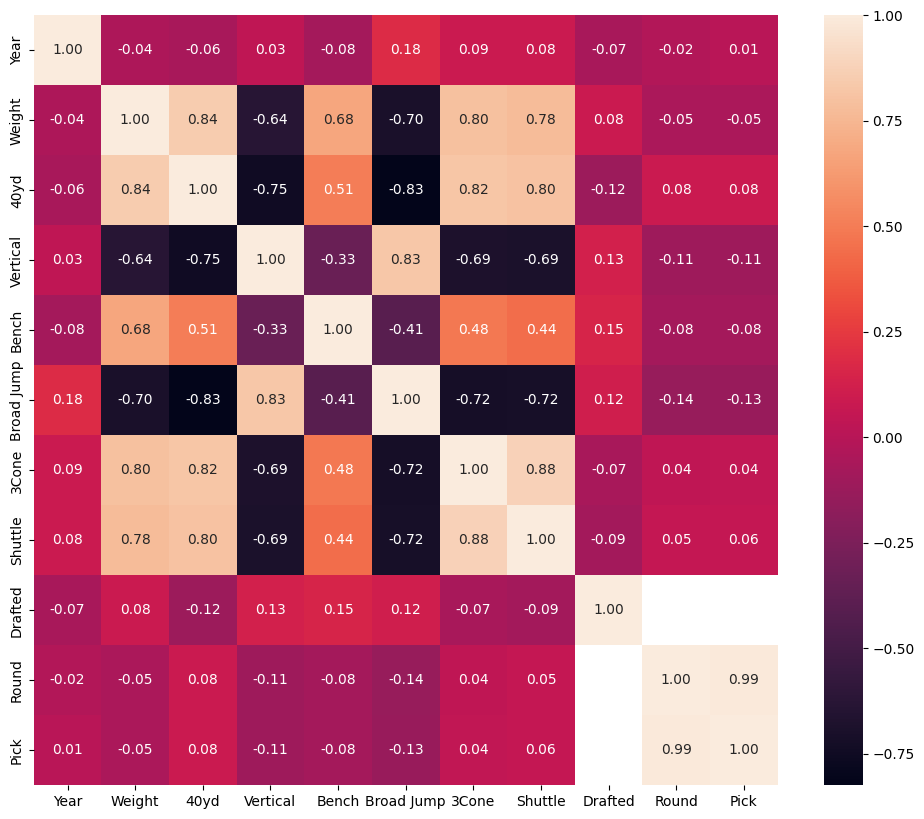

In [6]:
# adjust the size of the figure
plt.figure(figsize=(12,10))

# pass the correlation table into seaborn heatmap
# set annotation to be 2 floating point precisions
sns.heatmap(draft_data.corr(numeric_only = True), annot=True, fmt='.2f')
plt.show()

c:\Users\jason\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axes\_axes.py:6862: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

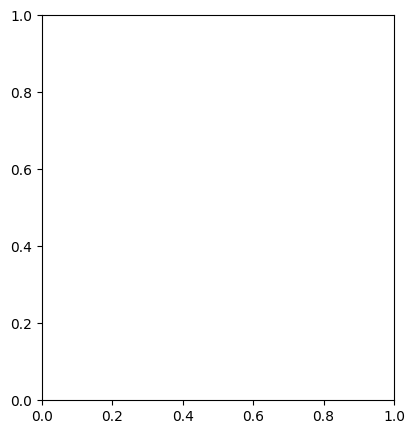

In [11]:
# select a set of feature columns as X and select the "type" column as y
selected_features = ['Weight', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
X = draft_data[selected_features]
y = draft_data['Drafted']
# we will set aside 20% of the training data as validation data
test_ratio = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_ratio,
                                                      random_state=RANDOM_SEED)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
y_train.hist()
plt.title('Training Label Distribution')

plt.subplot(1,2,2)
y_valid.hist()
plt.title('Validation Label Distribution')

plt.show()